## Stack plotting examples

### Load a single time-point stack

In [7]:
# load a single time-point stack
from PyMapManager.mmStack import mmStack

myFilePath = '/Users/cudmore/Desktop/data/julia/01_HC_ch1.tif'
stack = mmStack(filePath=myFilePath)



### Plot a single time-point stack

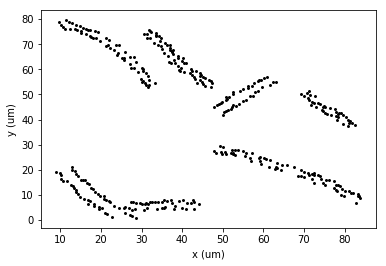

In [8]:
import matplotlib.pyplot as plt
from PyMapManager.mmUtil import newplotdict

pd = newplotdict()
pd['xstat'] = 'x'
pd['ystat'] = 'y'

pd = stack.getStackValues3(pd)

# plot with matplotlib
plt.scatter(pd['x'], pd['y'], marker='.', c='k', s=15)
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

In [9]:
### Same plot again but with segment tracings

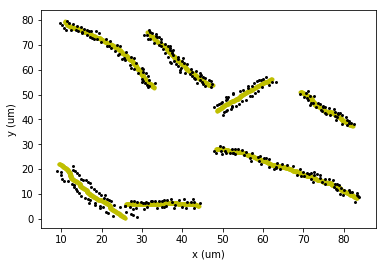

In [10]:
import matplotlib.pyplot as plt
from PyMapManager.mmUtil import newplotdict

pdLine = newplotdict()

pdLine = stack.line.getLineValues3(pdLine)

# plot with matplotlib
plt.scatter(pdLine['x'], pdLine['y'], marker='.', c='y')
plt.scatter(pd['x'], pd['y'], marker='.', c='k', s=15)
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

### Now we load the image and plot its maximal z-projection with spines and tracings.

In [39]:
###
# Load image by hand
###

"""
    byteorder : '>', '<'
        The endianness of data in the file.
        '>': big-endian (Motorola).
        '>': little-endian (Intel).
    is_*format* : bool
        If True, file is of a certain format.
        Formats are: bigtiff, movie, shaped, ome, imagej, stk, lsm, fluoview,
        nih, vista, 'micromanager, metaseries, mdgel, mediacy, tvips, fei,
        sem, scn, svs, scanimage, andor, epics, pilatus.
"""
import tifffile
#tmp = tifffile.TiffFile(myFilePath, is_imagej=True)
#tmp = tifffile.TiffFile(myFilePath, byteorder='>')
myFilePath = '/Users/cudmore/Desktop/data/julia/01_HC_ch1.tif'
tmp = tifffile.TiffFile(myFilePath)
print 'tmp:', tmp
print 'shape:', tmp.asarray().shape
print 'dtype:', tmp.asarray().dtype
print 'min:', np.amin(tmp.asarray())
print 'man:', np.amax(tmp.asarray())


goodFile = '/Users/cudmore/Desktop/data/rr30a/raw/rr30a_s1_ch2.tif'
tmp2 = tifffile.TiffFile(goodFile)
print 'tmp2:', tmp2
print tmp2.asarray().shape
print tmp2.asarray().dtype




tmp: TIFF file: 01_HC_ch1.tif, 15 MiB, big endian, imagej
shape: (18, 932, 932, 3)
dtype: uint16
min: 0
man: 65280
tmp2: TIFF file: rr30a_s1_ch2.tif, 130 MiB, little endian, 65 pages
(65, 1024, 1024)
uint16


In [38]:
from PIL import Image
import numpy as np

myFilePath = '/Users/cudmore/Desktop/data/julia/01_HC_ch1.tif'
im = Image.open(myFilePath)
#im.show()
imarray = np.array(im)
print imarray.shape, imarray.dtype

from libtiff import TIFF
tif = TIFF.open(myFilePath, mode='r')
image = tif.read_image()
print image.shape, image.dtype

(932, 932) uint8
(932, 932) uint8


mmStack.loadStackImages() just loaded a stack with a bizarre shape: (18, 932, 932, 3)
mmStack.loadStack() loaded map session None channel 1 in 0.23 seconds.
images.shape: (18, 932, 932, 3)
images.shape is now: (18, 932, 932)
images.dtype: uint16
amin: 2560
amax: 65280


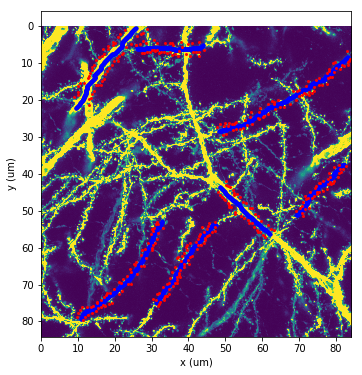

In [26]:
import numpy as np

###
images = stack.loadStackImages(channel=1)

print 'images.shape:', stack.images.shape # why the fuck are there 4 dimensions? They are not showing up in Fiji?

# what the fuck, imagej is saving 3 slices? Seems slice 1 has some values
images = images[:,:,:,1]
print 'images.shape is now:', images.shape
print 'images.dtype:', images.dtype # why is this opening as uint16? In Fiji it is 8-bit
print 'amin:', np.amin(images)
print 'amax:', np.amax(images)

#print images[10,:,:]

maxProject = np.amax(images, axis=0)

voxelx = stack.voxelx
voxely = stack.voxely

# set up the scale of the image in um
iLeft = 0
iTop = 0
iRight = voxelx * images.shape[1]
iBottom = voxely * images.shape[2]

# plot with matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(maxProject, extent=[iLeft, iRight, iBottom, iTop]) #l, r, b, t

# append line and spines to the plot as we did before
plt.scatter(pdLine['x'], pdLine['y'], marker='.', c='b')
plt.scatter(pd['x'], pd['y'], marker='.', c='r', s=15)
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

### The rest of this example will manipulate stacks loaded from a map. The interface is the same for both single time-point and map stacks.

In these examples, we will load a map with 9 sessions (stacks) and plot values from individual stacks within the map.

See **map.ipynb** for examples of plotting values in a map ACROSS all of its stacks.



In [23]:
from PyMapManager.mmMap import mmMap
# load a map
filePath = '/Users/cudmore/Desktop/data/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

#check the number of sessions in the map
for i in range(m.numSessions):
    print m.getStackName(i)

map rr30a loaded in 0.35 seconds.
rr30a_s0
rr30a_s1
rr30a_s2
rr30a_s3
rr30a_s4
rr30a_s5
rr30a_s6
rr30a_s7
rr30a_s8


In [17]:
#Grab the analysis for the first stack. Each row is a single 3D point annotation.
df = m.stacks[0].stackdb
#Look at the first 5 spines in the stack
df[df['roiType'].isin(['spineROI'])].head(5)

# Note, remove '.head(5)' to view tham all

,Idx,roiType,roiTypeNum,x,y,z,channel,groupID,parentID,cPnt,...,ubsdMean_int2,utssmoss_int2,utsmmosm_int2,utssdoss_int2,utsmdosm_int2,utssmods_int2,utsmmodm_int2,utssdods_int2,utsmdodm_int2,Unnamed: 48_int2
66,66,spineROI,0,51.686,28.691,31,1,NaN,0,71,...,2020.401316,177953,155.281850,1.770106,1.770106,143975,-224.339924,1.543191,0.614045,NaN
67,67,spineROI,0,45.800,30.019,31,1,NaN,0,19,...,2145.562249,179810,190.881104,2.005401,2.005401,43713,-251.674916,1.138797,0.602039,NaN
68,68,spineROI,0,49.955,29.384,31,1,NaN,0,58,...,1817.542735,106063,74.430175,1.620836,1.620836,56386,-276.870841,1.255700,0.412398,NaN
69,69,spineROI,0,53.683,27.691,30,1,NaN,0,93,...,1897.210526,186307,222.589008,2.007964,2.007964,113179,-122.288978,1.438741,0.783830,NaN
70,70,spineROI,0,58.368,27.422,32,1,NaN,0,133,...,2008.931250,73791,75.916667,1.496378,1.496378,-65236,-370.487809,0.773239,0.381846,NaN


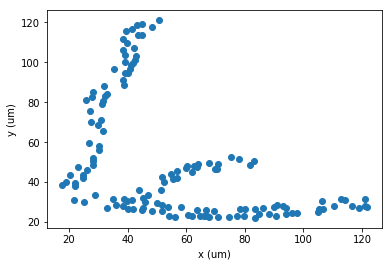

In [18]:
# Make some plots

import numpy as np
import matplotlib.pyplot as plt

# grab all spines in the first stack, we will use this dataframe for a few plots
df = m.stacks[0].stackdb
spines = df[df['roiType'].isin(['spineROI'])]

x = spines['x'].values
y = spines['y'].values

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

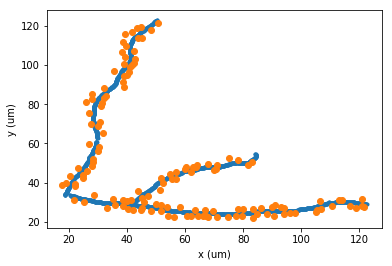

In [19]:
# Plot the spines along with dendritic tracing (lines)

# get the lines for stack 0
xyzLine = m.stacks[0].line.getLine() #this returns a 2d numpy array with columns of (x,y,z)
plt.plot(xyzLine[:,0], xyzLine[:,1], '.')

# plot the spines
x = spines['x'].values
y = spines['y'].values

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

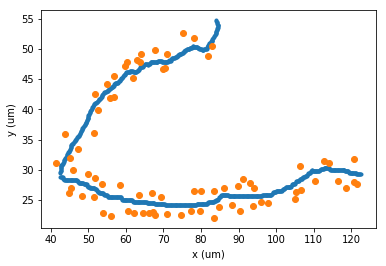

In [20]:
# plot spines in the first and second segment

stackIdx = 0
segmentID = [0, 1] # possible values are 0,1,2,3,4,5,6,7 as there are a total of 8 segments in the map

# plot the lines for stack 0, segment 1
xyzLine = m.stacks[stackIdx].line.getLine(segmentID) #this returns a 2d numpy array with columns of (x,y,z)
plt.plot(xyzLine[:,0], xyzLine[:,1], '.')

#plotSpines = spines[spines['parentID'].isin(denedriteID)]
# getValues() returns a list of numbers for a given stat
x = m.stacks[stackIdx].getStackValues2('x', segmentID=segmentID)
y = m.stacks[stackIdx].getStackValues2('y', segmentID=segmentID)

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

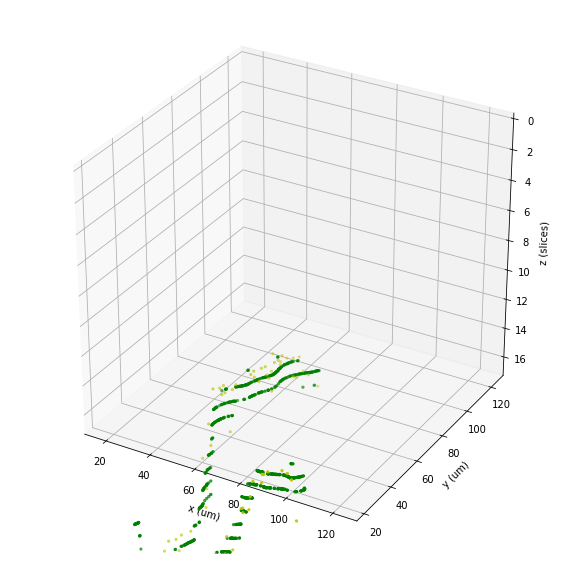

In [21]:
# each spine and line is actually a 3D point

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

segmentID = [] # set segmentID to empty and we can get objects from all segments

# grab all lines
xyzLine = m.stacks[stackIdx].line.getLine(segmentID) #this returns a 2d numpy array with columns of (x,y,z)

# grab all x, y, and z of spines
x = m.stacks[stackIdx].getStackValues2('x', segmentID=segmentID)
y = m.stacks[stackIdx].getStackValues2('y', segmentID=segmentID)
z = m.stacks[stackIdx].getStackValues2('z', segmentID=segmentID) # assuming z-step is 1 um this is equivalent to um (not always the case!)

# plot with matplotlib
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyzLine[:,0], xyzLine[:,1], xyzLine[:,2], marker='.', c='g') # plot lines
ax.scatter(x, y, z, marker='.', c='y') # plot spines

ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_zlabel('z (slices)')

numSlices = m.stacks[stackIdx].numSlices # FIXED: this is not valid until image is loaded -->> BAD BAD BAD
ax.set_zlim(numSlices, 0)

plt.show()

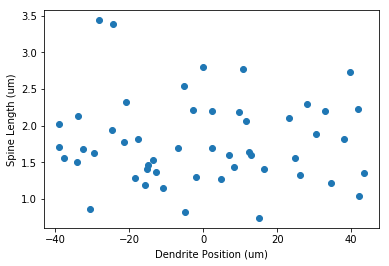

In [22]:
# up till now we have just been plotting the x/y image coordinates of spines

stackIdx = 0
segmentID = [0]

# plot spine length versus position along the dendritic segment
x = m.stacks[stackIdx].getStackValues2('pDist', segmentID=segmentID)
y = m.stacks[stackIdx].getStackValues2('sLen3d_int1', segmentID=segmentID)

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('Dendrite Position (um)')
plt.ylabel('Spine Length (um)')
plt.show()

## Pulling segment statistics using pandas pivot tables

In [24]:
import pandas as pd

stackIdx = 1
df = m.stacks[stackIdx].stackdb

# pandas pivot_table() pulls statistics (in this case, the mean, std, and n)
# for each unique value found in a column (in this case, 'parentID').

stat = 'sLen3d_int1'
pd.pivot_table(df,index=['parentID'],values=[stat],aggfunc=[np.mean, np.std, lambda x: len(x.dropna().unique())])

# That last term 'lambda x: len(x.dropna().unique())' is used to count the number of spines in each segment.
# This is getting complicated, time to learn python

,mean,std,<lambda>
,sLen3d_int1,sLen3d_int1,sLen3d_int1
parentID,,,
0,1.873956,0.588244,50
1,1.507003,0.557636,22
2,1.984370,0.720545,39
3,2.108810,0.453743,8
4,1.737929,0.769615,14
